This notebook examines the results of the initial clustering.

In [1]:
# Allow imports from `..`
import os
import sys

module_path = os.path.abspath("..")
if module_path not in sys.path:
   sys.path.append(module_path)

In [2]:
from src.acled import read_acled
from src.utils import *

In [3]:
import pickle

import geopandas
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn as skl
import sklearn.cluster 
from sklearn.preprocessing import StandardScaler

In [4]:
geosp_cl = read_acled('/Users/kandel/Desktop/Project/Rfiles/geosp_cl.csv')
geosp_cl = reproject_xy(geosp_cl)
geosp_cl.head()

,Unnamed: 0,data_id,cluster_label,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,...,event_ctr_actor1_30,fatality_sum_actor1_.30,fatality_sum_actor1_30,event_ctr_actor1_inter_.30,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_.30,fatality_sum_actor1_inter_30,geometry,x,y
0,1,4555008,66,404,KEN6850,6850,2019-03-08,2019,1,Violence against civilians,...,3,2,2,1,1,0,1,POINT (35.55000 0.99000),1.439370e+06,2.554391e+06
1,2,4555549,85,454,MAW433,433,2019-03-06,2019,1,Riots,...,0,0,0,2,0,0,0,POINT (32.88020 -13.79840),1.136761e+06,9.063593e+05
2,3,4559853,10,454,MAW430,430,2019-02-21,2019,2,Protests,...,4,0,0,3,2,0,0,POINT (34.33330 -14.36670),1.294295e+06,8.436218e+05
3,4,4560172,10,404,KEN6840,6840,2019-02-20,2019,1,Protests,...,16,0,0,11,12,0,0,POINT (35.18330 -0.58330),1.400870e+06,2.378300e+06
4,5,4560512,11,706,SOM27880,27880,2019-02-19,2019,2,Violence against civilians,...,86,84,140,22,26,30,67,POINT (46.62340 4.68150),2.645211e+06,3.013511e+06


<AxesSubplot:>

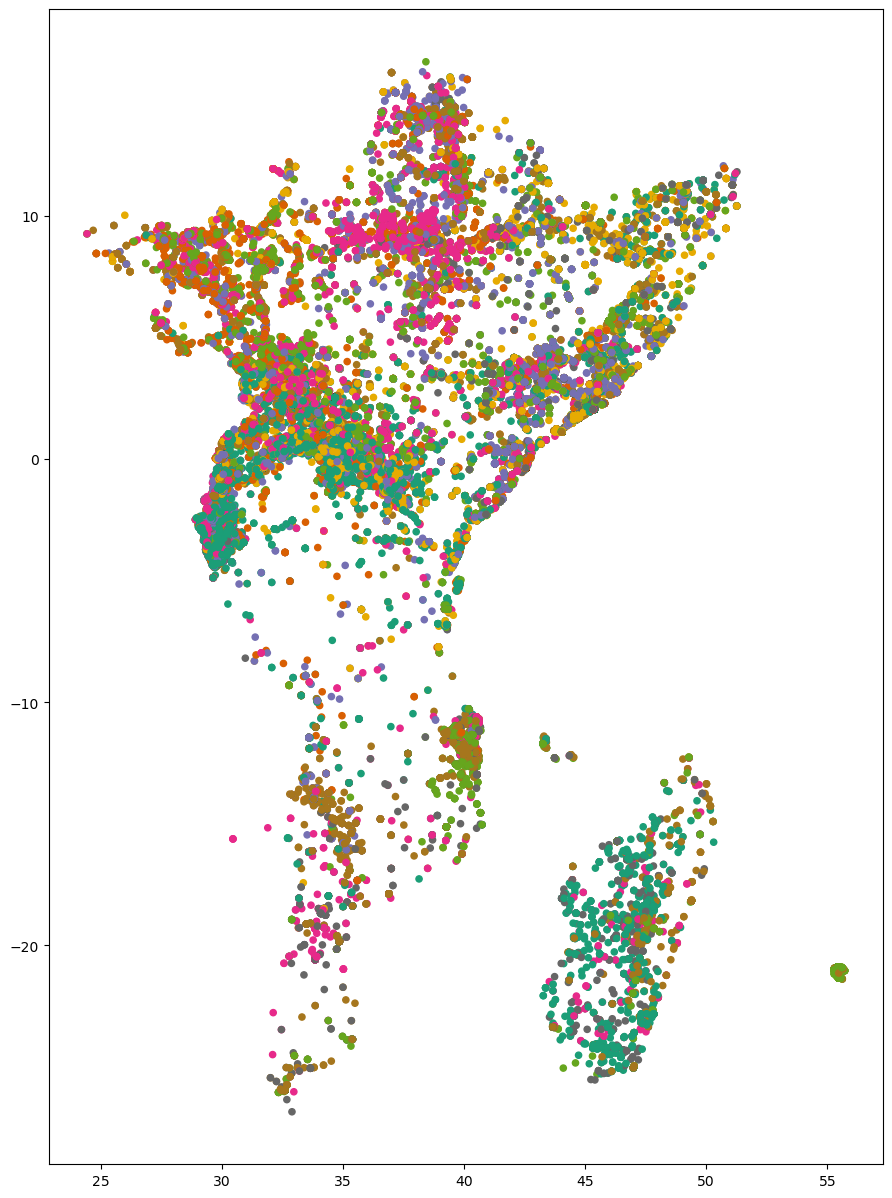

In [7]:
a1 = geosp_cl.plot(column='cluster_label',figsize=(20,15),markersize = 20, cmap = "Dark2")
a1

In [14]:
geosp_imp = read_acled('/Users/kandel/Desktop/Project/Rfiles/geosp_cl_imp.csv')
geosp_imp = reproject_xy(geosp_imp)
geosp_imp.head()

,Unnamed: 0,data_id,cluster_label,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,...,event_ctr_actor1_30,fatality_sum_actor1_.30,fatality_sum_actor1_30,event_ctr_actor1_inter_.30,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_.30,fatality_sum_actor1_inter_30,geometry,x,y
0,535,4830130,42,231,ETH2696,2696,2016-02-18,2016,1,Protests,...,159,39,76,81,97,0,0,POINT (40.70000 7.13330),1.986374e+06,3.259362e+06
1,536,4830131,42,231,ETH2698,2698,2016-02-18,2016,1,Protests,...,159,39,76,81,97,0,0,POINT (40.50000 6.33330),1.968089e+06,3.168693e+06
2,537,4830307,42,231,ETH2695,2695,2016-02-18,2016,1,Protests,...,159,39,76,81,97,0,0,POINT (41.86060 9.26220),2.101432e+06,3.504290e+06
3,538,4830308,42,231,ETH2697,2697,2016-02-18,2016,1,Protests,...,159,39,76,81,97,0,0,POINT (40.50000 6.98330),1.965250e+06,3.241604e+06
4,539,4830309,42,231,ETH2699,2699,2016-02-18,2016,1,Protests,...,159,39,76,81,97,0,0,POINT (37.66670 9.01670),1.647812e+06,3.456662e+06


<AxesSubplot:>

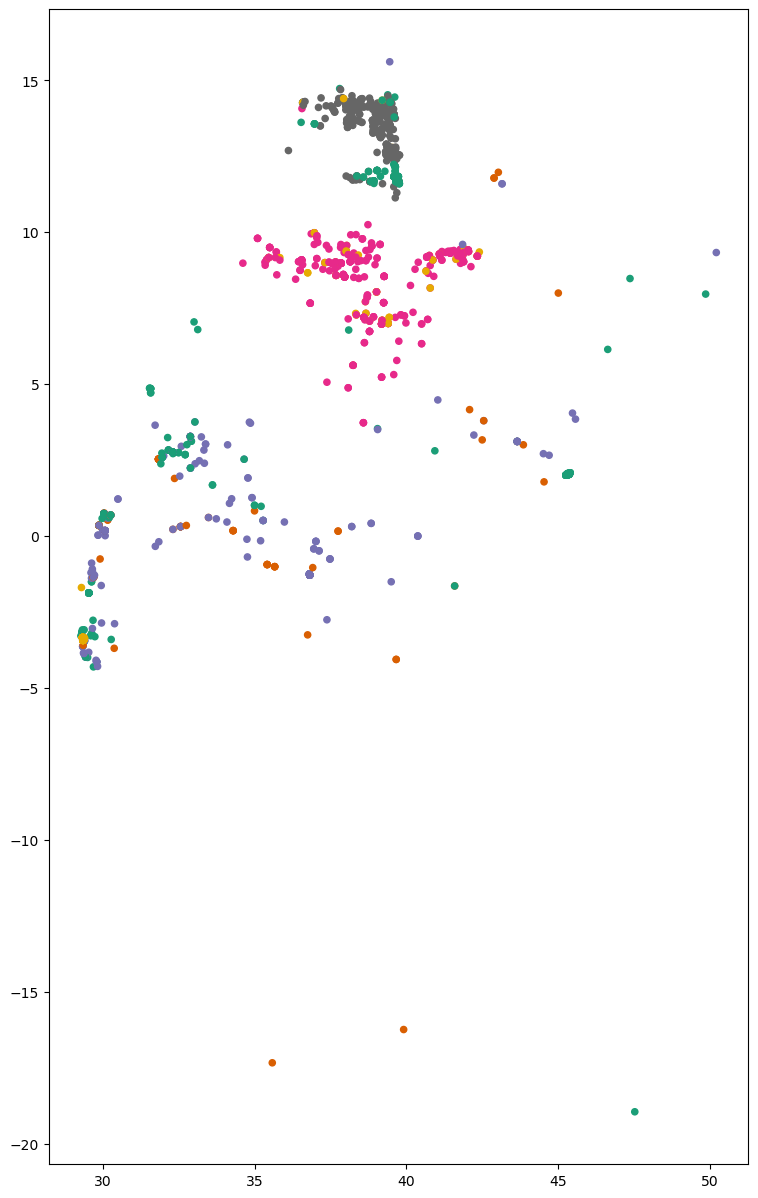

In [15]:
a2 = geosp_imp.plot(column='cluster_label',figsize=(20,15), markersize = 20, cmap = "Dark2")
a2